# Homework 6
This homework will build off the ideas about error-driven learning and the code you wrote implementing error-driven learning in HW5

In this homework, we will exam how neural networks with **hidden** layers can be used to solve similar classification problems

**Installing dependencies**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as R

# supress unnecessary warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

## Question 1

*Creating Training patterns and Teaching Patterns (XOR)*

Create 200 training patterns for each category, 400 total, 100 from each multivariate normal distribution

Make sure the matrix of training patterns and the matrix of teacher values are configured properly for Keras
* You will have to call `gensamples()` 4 times, once for each class

Here I set the means of the first group to: `(1,1), (-1,-1)`

And the means of the second group to: `(1, -1), (-1, 1)`

In [3]:
def gensamples(N, mx, my, sx, sy, r):
    M   = np.array([mx, my])
    Cov = np.array([[  sx*sx, r*sx*sy],
                    [r*sx*sy,   sy*sy]])
    return (R.multivariate_normal(M, Cov, size=N, check_valid='warn'))

In [4]:
# Number of patterns per distribution 
N = 100
s = 3

# First group
mx0 = s;  my0 = s
sx0 = 1.;  sy0 = 1.
r0 = 0.

mx1 = -s; my1 = -s
sx1 = 1.; sy1 = 1.
r1 = 0.

sample0 = gensamples(N, mx0, my0, sx0, sy0, r0)
sample1 = gensamples(N, mx1, my1, sx1, sy1, r1)

# Second group
mx2 = s;  my2 = -s
sx2 = 1.;  sy2 = 1.
r2 = 0.

mx3 = -s;  my3 = s
sx3 = 1.;  sy3 = 1.
r3 = 0.

sample2 = gensamples(N, mx2, my2, sx2, sy2, r2)
sample3 = gensamples(N, mx3, my3, sx3, sy3, r3)

In [5]:
# Creating the teaching patterns

# (1) Concatenate all the samples
train_pats = np.concatenate((sample0, sample1, sample2, sample3), axis=0)

# (2) Make teaching patterns correspond to training patterns
teach_pats = np.concatenate((np.zeros(2*N), np.ones(2*N)), axis=0)

# (3) Reshaping so teaching patterns are (2N, 1) arrays intead of 2N
print(f"Training pats:\t\t\t{teach_pats.shape}")
teach_pats =  np.reshape(teach_pats, (4*N, 1))
print(f"Training pats reshaped:\t\t{teach_pats.shape}")

print()
print("########### Shapes of in and out #########")
print(train_pats.shape)
print(teach_pats.shape)

test = [0, N, 2*N, 3*N]
for i in test:
    print(f"{train_pats[i]}:\t{teach_pats[i]}")

Training pats:			(400,)
Training pats reshaped:		(400, 1)

########### Shapes of in and out #########
(400, 2)
(400, 1)
[2.5167472  4.51008275]:	[0.]
[-3.16118821 -2.95776593]:	[0.]
[ 3.94839004 -2.03434768]:	[1.]
[-1.91338148  2.55094691]:	[1.]


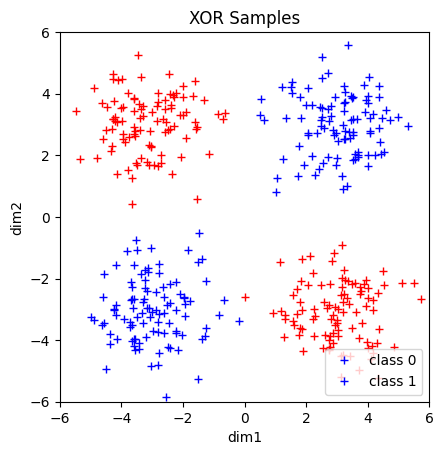

In [6]:
# plot example
plt.plot(sample0[:,0],sample0[:,1],'b+',sample1[:,0],sample1[:,1],'b+')
plt.plot(sample2[:,0],sample2[:,1],'r+',sample3[:,0],sample3[:,1],'r+')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.axis('equal')
plt.axis('square')
plt.legend(('class 0', 'class 1'), loc='lower right')
xymin = -6; xymax = 6
plt.ylim((xymin,xymax))
plt.xlim((xymin,xymax))
plt.title('XOR Samples')
plt.show()

## Question 2
*Creating Multi-layer neural network to solve XOR problem*

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [8]:
# Creating feed-forward network
network = models.Sequential()

nin = 2
nhid1 = 3
nhid2 = 3
nout = 1

# First layer
network.add(
    layers.Dense(
        nout,
        activation='tanh',
        input_shape=(nin,)
    )
)

# Second layer
network.add(
    layers.Dense(
        nhid2,
        activation='tanh',
    )
)


# Output layer
network.add(
    layers.Dense(
        nout,
        activation = "tanh"
    )
)

# configure optimizer
sgd = optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9)

# compile network
network.compile(optimizer=sgd, 
                loss='mean_squared_error', 
                metrics=['accuracy', 'mse'])

In [9]:
# Shuffling patterns
import numpy.random as rnd
shuffled_idx = rnd.permutation(train_pats.shape[0])
train_pats_shuffled = train_pats[shuffled_idx,:]
teach_pats_shuffled = teach_pats[shuffled_idx,:]

# Should be random
test = [0, N, 2*N, 3*N]
print(np.mean(teach_pats_shuffled[:N]))
for i in test:
    print(f"{train_pats_shuffled[i]}:\t{teach_pats_shuffled[i]}")

0.52
[ 3.01234023 -3.45961791]:	[1.]
[ 3.34536287 -2.07906617]:	[1.]
[2.07355567 2.65772117]:	[0.]
[0.63098888 3.15909121]:	[0.]


In [10]:
epochs = 100
# Training network
history = network.fit(
                      train_pats_shuffled, 
                      teach_pats_shuffled, 
                      verbose=True, 
                      validation_split=.2, 
                      epochs=epochs, 
                      batch_size=10)


Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 0.3994 - accuracy: 0.4563 - mse: 0.3994 - val_loss: 0.2507 - val_accuracy: 0.4875 - val_mse: 0.2507
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.7469 - mse: 0.2078 - val_loss: 0.1694 - val_accuracy: 0.9375 - val_mse: 0.1694
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1526 - accuracy: 0.9312 - mse: 0.1526 - val_loss: 0.1240 - val_accuracy: 0.9750 - val_mse: 0.1240
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1106 - accuracy: 0.9531 - mse: 0.1106 - val_loss: 0.0905 - val_accuracy: 0.9500 - val_mse: 0.0905
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9563 - mse: 0.0770 - val_loss: 0.0670 - val_accuracy: 0.9750 - val_mse: 0.0670
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0663 - accuracy: 0.9563 - mse: 0.0663 - val_loss: 0.0541 - v

### Justification
* Number of hidden layers (**2 hidden layers**)
  * 1 hidden layer had poor performance with `softmax`, `relu`, and `tanh` activation functions


* Number of nodes per layer (**2 -> 3 -> 3 -> 1**)
  * 2 or less neurons for seem to lack enough computational complexity to solve XOR in less than 25 epochs

Activation function 
* (`tanh`) worked well for XOR problem when tested on playground, and outperformed `softmax`

Optimizer (and any relevant optimizer settings)
*  Set learning rate = `.02`, when  `>.05`, accuracy would not be strictly increasing

The number of training epochs
* Appear to take around 25 - 40 epochs for `accuracy > .9`, but sometimes up to 80

Batch size
* Smaller batch sizes resulted in accuracy having dips (not strictly increasing)


## Question 3 Plotting
1. Training accuracy vs epoch
2. Loss and Validation loss vs epoch
3. Activation function visualization

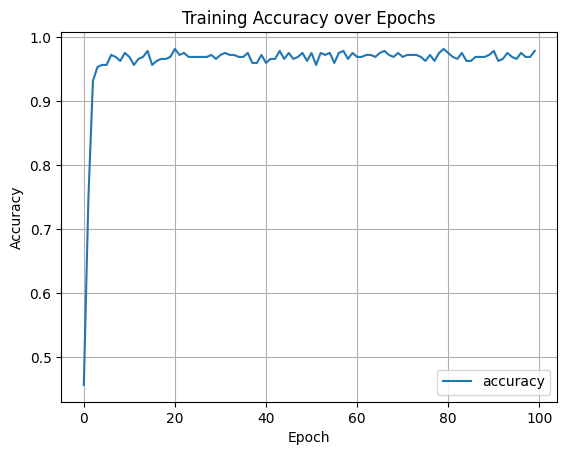

In [11]:
accuracy = history.history['accuracy']

plt.plot(accuracy, label="accuracy")
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training Accuracy over Epochs");

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'mse', 'val_loss', 'val_accuracy', 'val_mse'])


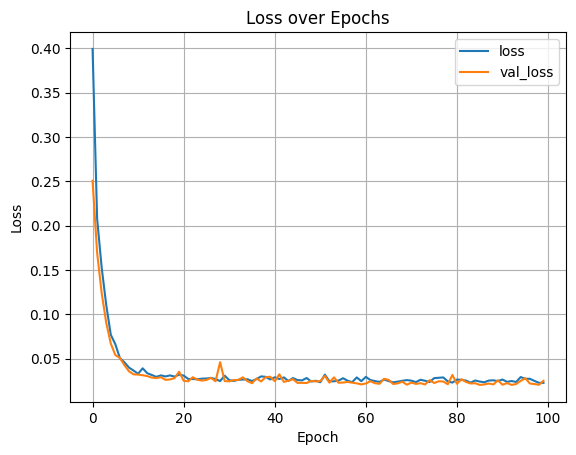

In [13]:
loss, val_loss = history.history['loss'], history.history["val_loss"]

plt.plot(loss, label="loss")
plt.plot(val_loss, label="val_loss")
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over Epochs");

In [14]:
# Use this function to create a plot for Q4
# xv is array of x-values of test grid (from meshgrid above) --- 
# yv is array of y-values of test grid (from meshgrid above)
# out is the output of the neural network given the test patterns
# sample0, sample1 are the training patterns from earlier

def plottest(xv, yv, out, sample0, sample1):
    # reshape out
    zv = out.reshape(xv.shape)

    # create figure
    fig = plt.figure()
    plt.contourf(xv, yv, zv, levels=xv.shape[0], cmap=plt.cm.gist_yarg)
    plt.plot(sample0[:,0], sample0[:,1], 'b+', 
             sample1[:,0], sample1[:,1], 'r+')    
    
    plt.xlabel('dim1')
    plt.ylabel('dim2')
    plt.axis('equal')
    plt.axis('square')
    xymin = -5; xymax = 7.5
    plt.ylim((xymin,xymax))
    plt.xlim((xymin,xymax))
    plt.show()

xymin = -6
xymax = 6
Npts = 50
xv, yv = np.meshgrid(np.linspace(xymin, xymax, Npts), 
                     np.linspace(xymin, xymax, Npts))
test_pats = np.concatenate((xv.reshape((Npts*Npts,1)), 
                            yv.reshape((Npts*Npts,1))), axis=1)

out = network.predict(test_pats)
class_0 = np.concatenate((sample0, sample1), axis=0)
class_1 = np.concatenate((sample2, sample3), axis=0)

79/79 [==============================] - 0s 923us/step


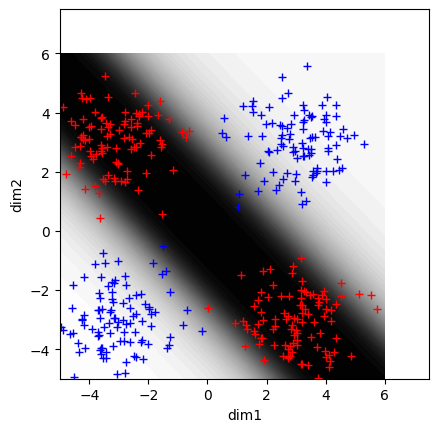

In [15]:
plottest(xv, yv, out, class_0, class_1)

## Question 4 
Creating new Classification Problem

Using two classes, create new distributions of points

In [16]:
# Number of patterns per distribution 
N = 100

# First group
mx0 = 0;  my0 = 0
sx0 = 5;  sy0 = 5
r0 = .95

mx1 = 0; my1 = 0
sx1 = 2.5; sy1 = 2.5
r1 = -.95

sample0 = gensamples(N, mx0, my0, sx0, sy0, r0)
sample1 = gensamples(N, mx1, my1, sx1, sy1, r1)

# Second group
mx2 = -7.5;  my2 = 0
sx2 = 1.5;  sy2 = 1.5
r2 = .1

mx3 = 7.5;  my3 = 0
sx3 = 1.3;  sy3 = 1.3
r3 = 0.2

mx4 = 0;  my4 = 7.5
sx4 = 1.2;  sy4 = 1.6

mx5 = 0;  my5 = -7.5
sx5 = .8;  sy5 = 1.6


sample2 = gensamples(N, mx2, my2, sx2, sy2, r2)
sample3 = gensamples(N, mx3, my3, sx3, sy3, r3)
sample4 =  gensamples(N, mx4, my4, sx4, sy4, r3)
sample5 =  gensamples(N, mx5, my5, sx5, sy5, r3)

In [29]:
# Creating the teaching patterns

# (1) Concatenate all the samples
train_pats = np.concatenate((sample0, sample1, sample2, sample3, sample4, sample5), axis=0)

# (2) Make teaching patterns correspond to training patterns
teach_pats = np.concatenate((np.zeros(2*N), np.ones(4*N)), axis=0)

# (3) Reshaping so teaching patterns are (2N, 1) arrays intead of 2N
print(f"Training pats:\t\t\t{teach_pats.shape}")
teach_pats =  np.reshape(teach_pats, (6*N, 1))
print(f"Training pats reshaped:\t\t{teach_pats.shape}")

print()
print("########### Shapes of in and out #########")
print(train_pats.shape)
print(teach_pats.shape)


Training pats:			(600,)
Training pats reshaped:		(600, 1)

########### Shapes of in and out #########
(600, 2)
(600, 1)


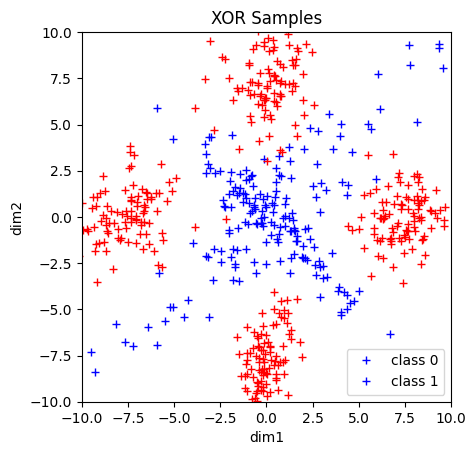

In [30]:
# plot example
plt.plot(sample0[:,0],sample0[:,1],'b+',sample1[:,0],sample1[:,1],'b+')
plt.plot(sample2[:,0],sample2[:,1],'r+',sample3[:,0],sample3[:,1],'r+', sample4[:,0],sample4[:,1],'r+', sample5[:,0],sample5[:,1],'r+')
plt.xlabel('dim1')
plt.ylabel('dim2')
plt.axis('equal')
plt.axis('square')
plt.legend(('class 0', 'class 1'), loc='lower right')
xymin = -10; xymax = 10
plt.ylim((xymin,xymax))
plt.xlim((xymin,xymax))
plt.title('XOR Samples')
plt.show()

# Question 5
Create NN to solve Nonlinearly separable classification problem

In [34]:

# Creating feed-forward network
network = models.Sequential()

nin = 2
nhid1 = 4
nhid2 = 4
nout = 1

# First layer
network.add(
    layers.Dense(
        nout,
        activation='tanh',
        input_shape=(nin,)
    )
)

# Second layer
network.add(
    layers.Dense(
        nhid2,
        activation='tanh',
    )
)

# Output layer
network.add(
    layers.Dense(
        nout,
        activation = "tanh"
    )
)

# configure optimizer
sgd = optimizers.SGD(learning_rate=0.03, decay=1e-6, momentum=0.9)

# compile network
network.compile(optimizer=sgd, 
                loss='mean_squared_error', 
                metrics=['accuracy', 'mse'])

In [35]:
# Shuffling patterns
import numpy.random as rnd
shuffled_idx = rnd.permutation(train_pats.shape[0])
train_pats_shuffled = train_pats[shuffled_idx,:]
teach_pats_shuffled = teach_pats[shuffled_idx,:]

# Should be random
test = [0, N, 2*N, 3*N]
print(np.mean(teach_pats_shuffled[:N]))
for i in test:
    print(f"{train_pats_shuffled[i]}:\t{teach_pats_shuffled[i]}")

0.65
[-0.79644636  7.29112554]:	[1.]
[-3.0932576  -5.40652017]:	[0.]
[0.75908712 7.22769327]:	[1.]
[2.04336084 3.69612476]:	[0.]


In [36]:
epochs = 200
# Training network
history = network.fit(
                      train_pats_shuffled, 
                      teach_pats_shuffled, 
                      verbose=True, 
                      validation_split=.2, 
                      epochs=epochs, 
                      batch_size=20)


Epoch 1/200
24/24 [==============================] - 0s 6ms/step - loss: 0.5140 - accuracy: 0.6167 - mse: 0.5140 - val_loss: 0.2453 - val_accuracy: 0.7167 - val_mse: 0.2453
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.6542 - mse: 0.3046 - val_loss: 0.2429 - val_accuracy: 0.7167 - val_mse: 0.2429
Epoch 3/200
24/24 [==============================] - 0s 3ms/step - loss: 0.2987 - accuracy: 0.6542 - mse: 0.2987 - val_loss: 0.2375 - val_accuracy: 0.7167 - val_mse: 0.2375
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.6542 - mse: 0.2932 - val_loss: 0.2313 - val_accuracy: 0.7167 - val_mse: 0.2313
Epoch 5/200
24/24 [==============================] - 0s 3ms/step - loss: 0.2774 - accuracy: 0.6542 - mse: 0.2774 - val_loss: 0.2152 - val_accuracy: 0.7167 - val_mse: 0.2152
Epoch 6/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.6542 - mse: 0.2437 - val_loss: 0.2089 - v

### Justification
* Number of hidden layers (**2 hidden layers**)
  * 1 hidden layer had poor performance with `tanh` activation functions


* Number of nodes per layer (**2 -> 4 -> 4 -> 1**)
  * using 2-3 nodes on either hidden layer resulted in less reliable classification

Activation function 
* (`tanh`) worked well for XOR problem when tested on playground, and outperformed `softmax`

Optimizer (and any relevant optimizer settings)
*  Set learning rate = `.02`, when  `>.05`, accuracy would not be strictly increasing and when smaller takes longer to train

The number of training epochs
* Appear to take around 50+ epochs for `accuracy > .85`

Batch size
* Smaller batch sizes resulted in accuracy having dips (not strictly increasing)

# Question 6

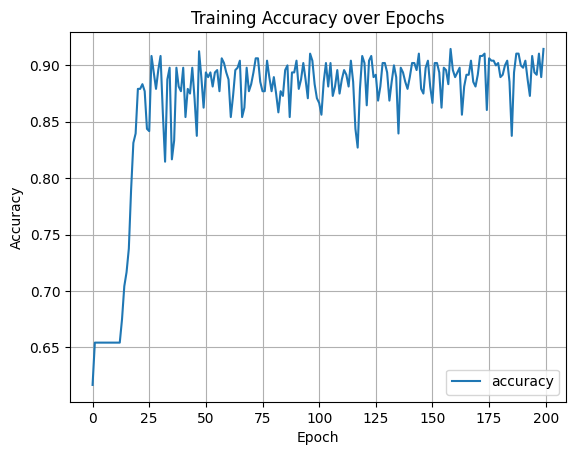

In [37]:
accuracy = history.history['accuracy']

plt.plot(accuracy, label="accuracy")
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training Accuracy over Epochs");

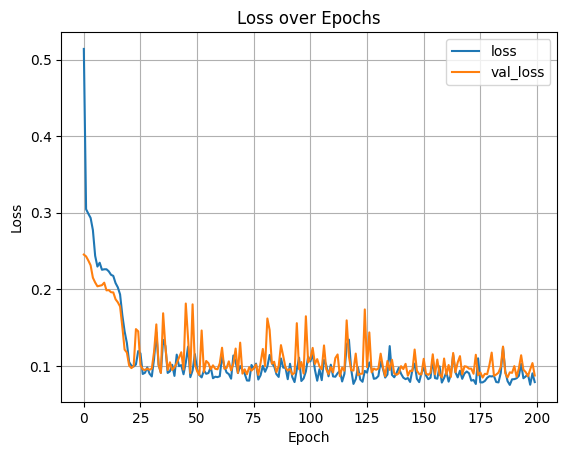

In [38]:
loss, val_loss = history.history['loss'], history.history["val_loss"]

plt.plot(loss, label="loss")
plt.plot(val_loss, label="val_loss")
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over Epochs");

In [39]:
def plottest(xv, yv, out, sample0, sample1):
    # reshape out
    zv = out.reshape(xv.shape)

    # create figure
    fig = plt.figure()
    plt.contourf(xv, yv, zv, levels=xv.shape[0], cmap=plt.cm.gist_yarg)
    plt.plot(sample0[:,0], sample0[:,1], 'b+', 
             sample1[:,0], sample1[:,1], 'r+')    
    
    plt.xlabel('dim1')
    plt.ylabel('dim2')
    plt.axis('equal')
    plt.axis('square')
    xymin = -10; xymax = 10
    plt.ylim((xymin,xymax))
    plt.xlim((xymin,xymax))
    plt.show()

xymin = -10
xymax = 10
Npts = 50
xv, yv = np.meshgrid(np.linspace(xymin, xymax, Npts), 
                     np.linspace(xymin, xymax, Npts))
test_pats = np.concatenate((xv.reshape((Npts*Npts,1)), 
                            yv.reshape((Npts*Npts,1))), axis=1)

out = network.predict(test_pats)
class_0 = np.concatenate((sample0, sample1), axis=0)
class_1 = np.concatenate((sample2, sample3, sample4, sample5), axis=0)

79/79 [==============================] - 0s 958us/step


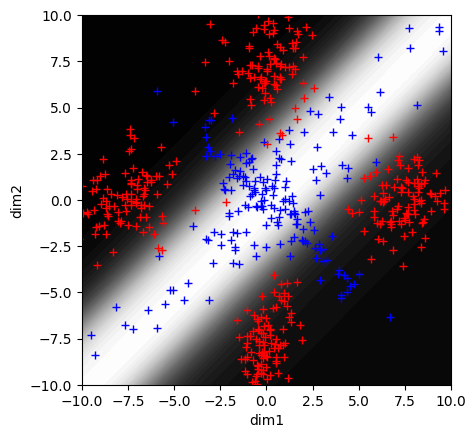

In [40]:
plottest(xv, yv, out, class_0, class_1)